## Relationships

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

### Scatter plot
Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

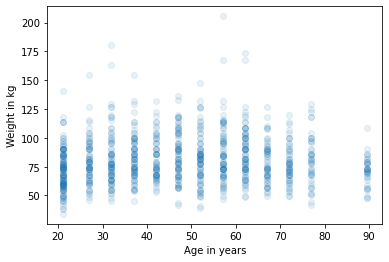

In [1]:
# import data
import pandas as pd

brfss = pd.read_hdf('brfss.hdf5')

# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

import matplotlib.pyplot as plt
# Make a scatter plot
plt.plot(age,weight,'o', alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()



### Jittering
In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

height_jitter = height + np.random.normal(0, 2, size=len(brfss))

weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

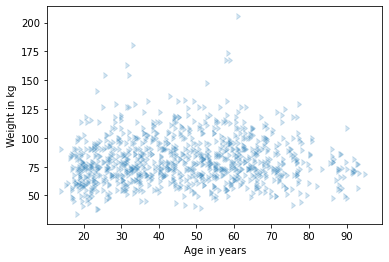

In [3]:
import numpy as np
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size = len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', marker = 5, alpha = 0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

### Height and weight
Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

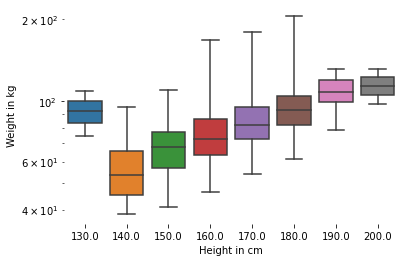

In [5]:
import seaborn as sns 
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x = '_HTMG10', y = 'WTKG3', data = data, whis = 10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


### Income and height
Let's now use a violin plot to visualize the relationship between income and height.

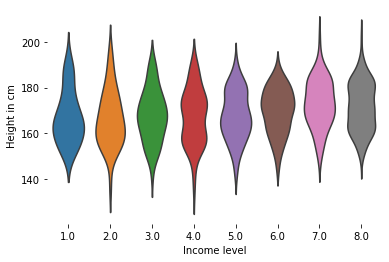

In [6]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y = 'HTM4', data = data, inner = None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


### Computing correlations
The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

In [7]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


### Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [8]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


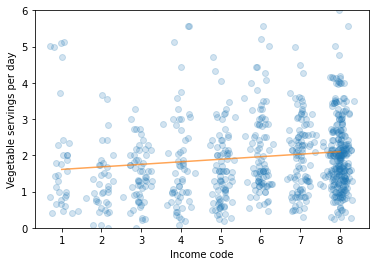

In [10]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()